In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy .stats as stats
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/Data Science/Assignments/Simple linear regration/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


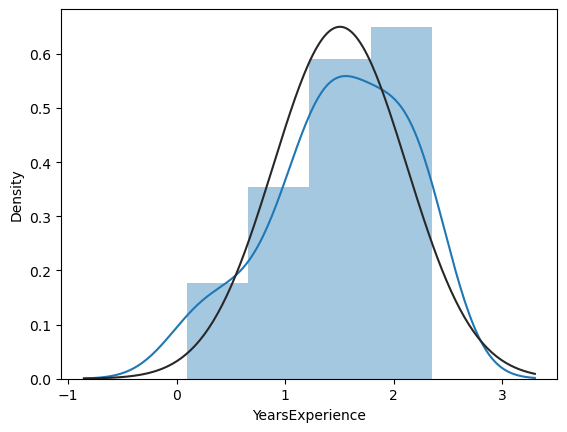

<Figure size 640x480 with 0 Axes>

In [4]:
df_log = pd.DataFrame()
df_log['YearsExperience'] = np.log(df['YearsExperience'])
df_log['YearsExperience'] = np.log(df['YearsExperience'])
sns.distplot(df_log['YearsExperience'], fit=norm)
fig = plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


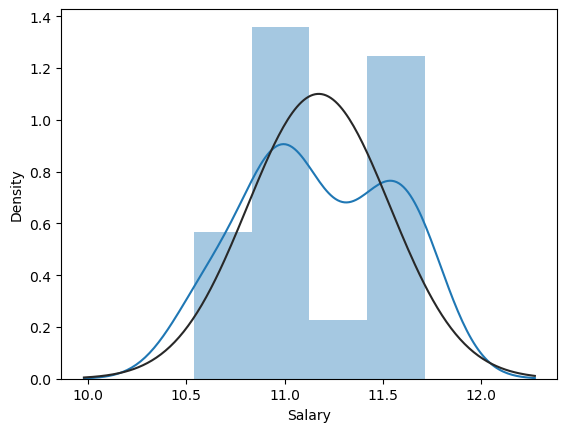

<Figure size 640x480 with 0 Axes>

In [5]:
df_log = pd.DataFrame()
df_log['Salary'] = np.log(df['Salary'])
df_log['Salary'] = np.log(df['Salary'])
sns.distplot(df_log['Salary'], fit=norm)
fig = plt.figure()

In [6]:
print(df_log.columns)


Index(['Salary'], dtype='object')


In [7]:
df_log['Salary'] = np.log(df['Salary'])


In [8]:
scaled_Salary = (df_log['Salary'] - np.mean(df_log['Salary'])) / np.sqrt(np.var(df_log['Salary']))
scaled_Salary 

0    -1.637949
1    -1.194554
2    -1.753331
3    -1.359349
4    -1.599800
5    -0.632863
6    -0.467136
7    -0.741967
8    -0.276919
9    -0.606357
10   -0.329935
11   -0.674465
12   -0.617568
13   -0.611570
14   -0.423421
15   -0.131345
16   -0.209950
17    0.423843
18    0.365982
19    0.762398
20    0.696980
21    0.886762
22    0.970485
23    1.291625
24    1.183365
25    1.084613
26    1.367085
27    1.262955
28    1.492053
29    1.480333
Name: Salary, dtype: float64

In [9]:
df['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

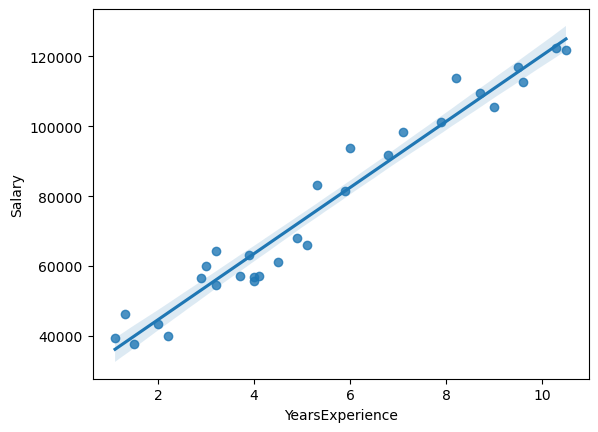

In [10]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

# 2 Model Building

In [11]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

In [12]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [14]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [15]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [16]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [18]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64